In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_train_data = "/home/jp_capo_98/Documents/ML-Titanic/Data/train.csv"
path_test_data = "/home/jp_capo_98/Documents/ML-Titanic/Data/test.csv"

In [3]:
# import the data
train_df = pd.read_csv(path_train_data)
test_df = pd.read_csv(path_test_data)

In [4]:
# visualize data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# get the labels
labels = train_df["Survived"]

In [7]:
# get the important features
train_features = train_df[["Pclass", "Sex", "Age"]]
test_features = test_df[["Pclass", "Sex", "Age"]]

In [8]:
train_features.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [9]:
test_features.head()

,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [10]:
# look for missing values
train_features.isnull().any()

Pclass    False
Sex       False
Age        True
dtype: bool

In [11]:
test_features.isnull().any()

Pclass    False
Sex       False
Age        True
dtype: bool

In [12]:
age_mean = np.mean(train_features["Age"])
print(age_mean)

29.69911764705882


In [13]:
# Fill missing ages with the mean
train_features["Age"].fillna(age_mean, inplace=True)
test_features["Age"].fillna(age_mean, inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

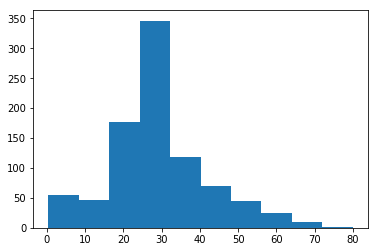

In [14]:
# Visualize the distribution of ages
plt.hist(train_features["Age"])

In [15]:
# get the numnber of clases
train_features["Pclass"].unique()

array([3, 1, 2])

In [16]:
# one hot encode
train_features = pd.concat([train_features.drop(["Pclass", "Sex"], axis=1), pd.get_dummies(train_features["Pclass"], prefix="Pclass_", dtype=np.float32), pd.get_dummies(train_features["Sex"], prefix="Sex_", dtype=np.float32)], axis=1)
train_features.head()

,Age,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male
0,22.0,0.0,0.0,1.0,0.0,1.0
1,38.0,1.0,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,1.0,1.0,0.0
3,35.0,1.0,0.0,0.0,1.0,0.0
4,35.0,0.0,0.0,1.0,0.0,1.0


In [17]:
test_features = pd.concat([test_features.drop(["Pclass", "Sex"], axis=1), pd.get_dummies(test_features["Pclass"], prefix="Pclass_", dtype=np.float32), pd.get_dummies(test_features["Sex"], prefix="Sex_", dtype=np.float32)], axis=1)
test_features.head()

,Age,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male
0,34.5,0.0,0.0,1.0,0.0,1.0
1,47.0,0.0,0.0,1.0,1.0,0.0
2,62.0,0.0,1.0,0.0,0.0,1.0
3,27.0,0.0,0.0,1.0,0.0,1.0
4,22.0,0.0,0.0,1.0,1.0,0.0


In [18]:
# bucketize the age
train_features = pd.concat([train_features.drop("Age", axis=1),pd.get_dummies(pd.cut(train_features["Age"], [0,10,20,30,60,100]), prefix="Age", dtype=np.float32)], axis=1)
train_features.head()

,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 60]","Age_(60, 100]"
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
test_features = pd.concat([test_features.drop("Age", axis=1),pd.get_dummies(pd.cut(test_features["Age"], [0,10,20,30,60,100]), prefix="Age", dtype=np.float32)], axis=1)
test_features.head()

,Pclass__1,Pclass__2,Pclass__3,Sex__female,Sex__male,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 60]","Age_(60, 100]"
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
# one hot encode the labels
labels = pd.get_dummies(labels, prefix="Survived")
labels.head()

,Survived_0,Survived_1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [21]:
print("Training_shape: {}\tTest_shape: {}\tLabels_shape: {}".format(train_features.shape, test_features.shape, labels.shape))

Training_shape: (891, 10)	Test_shape: (418, 10)	Labels_shape: (891, 2)


In [22]:
train_features["Pclass__3"].dtype

dtype('float32')

### Separate Data

In [23]:
train_x = train_features.iloc[:750]
train_y = labels.iloc[:750]
validation_x = train_features.iloc[750:]
validation_y = labels.iloc[750:]

### Helper functions

In [24]:
# weight initialization helper function
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return(tf.Variable(init_random_dist))

In [25]:
# bias initialization function
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,  shape=shape)
    return (tf.Variable(init_bias_vals))

In [26]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.nn.relu(tf.matmul(input_layer, W)+b))

In [27]:
def output_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return (tf.matmul(input_layer, W)+b)

### Placeholders

In [28]:
with tf.name_scope("Inputs"):
    x = tf.placeholder(tf.float32, shape=[None, 10])
    y_true = tf.placeholder(tf.float32, shape=[None, 2])
    hold_prob = tf.placeholder(tf.float32, name="hold_probability")
    batch_size = tf.placeholder(tf.int64, name="batch_size")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

### Dataset

In [32]:
with tf.name_scope("Datasets"):
    with tf.name_scope("Train_Dataset"):
        train_dataset = tf.data.Dataset.from_tensor_slices((train_y, train_x))
        train_dataset = train_dataset.shuffle(3000)
        train_dataset = train_dataset.repeat()
        train_dataset = train_dataset.batch(batch_size)
    
    with tf.name_scope("eval_train_dataset"):
        eval_train_dataset = tf.data.Dataset.from_tensor_slices((train_y, train_x))
        eval_train_dataset = eval_train_dataset.batch(batch_size)
        
    with tf.name_scope("validation_dataset"):
        validation_dataset = tf.data.Dataset.from_tensor_slices((validation_y, validation_x))
        validation_dataset = validation_dataset.batch(batch_size)
    
    with tf.name_scope("test_dataset"):
        test_dataset = tf.data.Dataset.from_tensor_slices((test_features))
        test_dataset = test_dataset.batch(batch_size)

### Iterators

In [36]:
with tf.name_scope("Iterator"):
    # train iterator
    with tf.name_scope("Train_Iterator"):
        train_iterator = tf.data.Iterator.from_structure(train_dataset.output_types, train_dataset.output_shapes)
        next_element_train = train_iterator.get_next()
        train_init_op = train_iterator.make_initializer(train_dataset)
    # train evaluation iterator
    with tf.name_scope("train_evaluation_iterator"):
        eval_train_iterator = tf.data.Iterator.from_structure(eval_train_dataset.output_types, eval_train_dataset.output_shapes)
        next_element_eval_train = eval_train_iterator.get_next()
        eval_train_init_op = eval_train_iterator.make_initializer(eval_train_dataset)
    # validation iterator
    with tf.name_scope("validation_iterator"):
        validation_iterator = tf.data.Iterator.from_structure(validation_dataset.output_types, validation_dataset.output_shapes)
        next_element_validation = validation_iterator.get_next()
        validation_init_op = validation_iterator.make_initializer(validation_dataset)
    # test iterator
    with tf.name_scope("test_iterator"):
        test_iterator = tf.data.Iterator.from_structure(test_dataset.output_types, test_dataset.output_shapes)
        next_element_test = test_iterator.get_next()
        test_init_op = test_iterator.make_initializer(test_dataset)

### Graph

In [42]:
with tf.name_scope("graph"):
    hidden_1 = normal_full_layer(x, 256)
    hidden_2 = normal_full_layer(hidden_1, 512)
    dropout_1 = tf.nn.dropout(hidden_2, keep_prob=hold_prob)
    hidden_3 = normal_full_layer(dropout_1, 256)
    hidden_4 = normal_full_layer(hidden_3, 64)
    dropout_2 = tf.nn.dropout(hidden_4, keep_prob=hold_prob)
    y_pred = output_full_layer(dropout_2, 2)

### Loss function

In [43]:
with tf.name_scope("Loss"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred)
    mean_cross_entropy = tf.reduce_mean(cross_entropy)

### Optimizer

In [44]:
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

### Train Function

In [45]:
with tf.name_scope("training"):
    train = optimizer.minimize(mean_cross_entropy)

### Prediction function

In [46]:
with tf.name_scope("Predicting"):
    y_soft = tf.nn.softmax(y_pred)
    prediction = tf.argmax(y_soft, axis=1)

### Evalution Metrics - Accuracy, Loss

In [47]:
# Accuracy
with tf.name_scope("Accuracy_tensorboard"):
    y_true_arg_max = tf.argmax(y_true, axis=1)
    correct_predictions = tf.equal(prediction, y_true_arg_max)
    batch_acc = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    acc_arr = tf.placeholder(tf.float32)
    full_accuracy = tf.reduce_mean(acc_arr)
    accuracy_summary = tf.summary.scalar("Accuracy", full_accuracy)

In [48]:
# Loss
with tf.name_scope("Loss_tensorboard"):
    loss_arr = tf.placeholder(tf.float32)
    full_loss = tf.reduce_mean(loss_arr)
    loss_summary = tf.summary.scalar("Loss", full_loss)

In [49]:
# Summary merger
merged_op = tf.summary.merge_all()

### Checkpoint saver

In [50]:
saver = tf.train.Saver()

### Variable initializer

In [51]:
init = tf.global_variables_initializer()

### Training

In [53]:
batch_size_input = 32
learning_rate_input = 0.0001
dropout_input = 0.7
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    # initiate variables
    sess.run(init)
    
    #saver.restore(sess, "./best_models/eightyfouracc/final.ckpy")
    
    # create filewriters for tensorboard
    train_writer = tf.summary.FileWriter("./tensorboard/train_run2", graph=tf.get_default_graph())
    validation_writer = tf.summary.FileWriter("./tensorboard/validation_run2", graph=tf.get_default_graph())
    
    # initiate training iterator
    dataset_feed = {batch_size:batch_size_input}
    sess.run(train_init_op, feed_dict=dataset_feed)
    
    # training
    for step in range(15001):
        # saving summary every one hundred steps
        if step % 300 == 0:
            # Evaluate training data metrics
            acc = []
            loss = []
            sess.run(eval_train_init_op, feed_dict=dataset_feed)
            # run one epoch on training evaluation dataset
            while True:
                try:
                    batch_labels, batch_features = sess.run(next_element_eval_train)
                except tf.errors.OutOfRangeError:
                    break
                train_eval_feed = {y_true:batch_labels, x:batch_features, hold_prob:1.0}
                acc.append(sess.run(batch_acc, feed_dict=train_eval_feed))
                loss.append(sess.run(mean_cross_entropy, feed_dict=train_eval_feed))
            train_eval_feed = {acc_arr: acc, loss_arr:loss}
            # save the summary
            summary = sess.run(merged_op, feed_dict=train_eval_feed)
            train_writer.add_summary(summary, step)
            train_writer.flush()
            print("Saved train summary at step #{}".format(step))
            
            # Evaluate validation data metrics
            acc = []
            loss = []
            sess.run(validation_init_op, feed_dict=dataset_feed)
            while True:
                try:
                    batch_labels, batch_features = sess.run(next_element_validation)
                except tf.errors.OutOfRangeError:
                    break
                validation_feed = {y_true:batch_labels, x:batch_features, hold_prob:1.0}
                acc.append(sess.run(batch_acc, feed_dict=validation_feed))
                loss.append(sess.run(mean_cross_entropy, feed_dict=validation_feed))
            validation_feed = {acc_arr: acc, loss_arr:loss}
            summary = sess.run(merged_op, feed_dict=validation_feed)
            validation_writer.add_summary(summary, step)
            validation_writer.flush()
            print("Saved validation summary at step #{}".format(step))
        
        # Checkpoint saving every 1000 steps
        if step % 1000 == 0:
            saver.save(sess, "./model/step_{}.ckpy".format(step))
            print("Saved checkpoint in step #{}".format(step))
        
        # training
        batch_labels, batch_features = sess.run(next_element_train)
        train_feed = {y_true:batch_labels, x:batch_features, hold_prob:dropout_input,
                  learning_rate:learning_rate_input}
        sess.run(train, feed_dict=train_feed)
        if step == 0:
            print("Finished first train call")
    
    saver.save(sess, "./model/final.ckpy")
    print("Training is done")

Saved train summary at step #0
Saved validation summary at step #0
Saved checkpoint in step #0
Finished first train call
Saved train summary at step #300
Saved validation summary at step #300
Saved train summary at step #600
Saved validation summary at step #600
Saved train summary at step #900
Saved validation summary at step #900
Saved checkpoint in step #1000
Saved train summary at step #1200
Saved validation summary at step #1200
Saved train summary at step #1500
Saved validation summary at step #1500
Saved train summary at step #1800
Saved validation summary at step #1800
Saved checkpoint in step #2000
Saved train summary at step #2100
Saved validation summary at step #2100
Saved train summary at step #2400
Saved validation summary at step #2400
Saved train summary at step #2700
Saved validation summary at step #2700
Saved train summary at step #3000
Saved validation summary at step #3000
Saved checkpoint in step #3000
Saved train summary at step #3300
Saved validation summary at 

### Prediction

In [62]:
batch_size_input = 32

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess, "./model/final.ckpy")
    dataset_feed = {batch_size:batch_size_input}
    sess.run(test_init_op, feed_dict=dataset_feed)
    
    results = {"PassengerId":[], "Survived":[]}
    passenger_num = 892
    while True:
        try:
            batch_features = sess.run(next_element_test)
        except tf.errors.OutOfRangeError:
            break
        test_feed = {x:batch_features, hold_prob:1, batch_size:batch_size_input}
        predicts = sess.run(prediction, feed_dict=test_feed)
        for pred in predicts:
            results["PassengerId"].append(passenger_num)
            passenger_num += 1
            results["Survived"].append(pred)

INFO:tensorflow:Restoring parameters from ./model/final.ckpy


In [63]:
results_df = pd.DataFrame(results)

In [65]:
results_df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [68]:
results_df.set_index("PassengerId", inplace=True)
results_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [69]:
results_df.to_csv("results.csv")